In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.options.display.max_rows = 4000

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.shape

(145557, 23)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020219
MaxTemp           0.866327
Rainfall          2.241046
Evaporation      43.204380
Sunshine         48.044409
WindGustDir       7.096189
WindGustSpeed     7.052907
WindDir9am        7.263134
WindDir3pm        2.907452
WindSpeed9am      1.214644
WindSpeed3pm      2.104330
Humidity9am       1.823341
Humidity3pm       3.096381
Pressure9am      10.349897
Pressure3pm      10.324478
Cloud9am         38.450916
Cloud3pm         40.833488
Temp9am           1.213957
Temp3pm           2.479441
RainToday         2.241046
RainTomorrow      2.245169
dtype: float64

In [8]:
df.shape

(145557, 23)

In [9]:
threshold = 0.4

# Dropping columns with missing value rate higher than threshold

In [10]:
data = df[df.columns[df.isnull().mean() < threshold]]
data.shape

(145557, 20)

# Dropping rows with missing value rate higher than threshold

In [11]:
data = data.loc[df.isnull().mean(axis=1) < threshold]
data.shape

(142440, 20)

# Numerical Imputation

### Filling all missing values with 0

In [12]:
data = df.fillna(0)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Filling missing values with medians of the columns

In [13]:
data = df.fillna(data.median())

In [14]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,1.6,0.1,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,1.6,0.1,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,1.6,0.1,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,1.6,0.1,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,1.0,1.0,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,1.6,0.1,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Categorical Imputation

### Max fill function for categorical columns

In [15]:
df['WindGustDir'].value_counts()

W      9933
SE     9421
N      9317
SSE    9223
E      9182
S      9171
WSW    9077
SW     8974
SSW    8737
WNW    8270
NW     8128
ENE    8105
ESE    7374
NE     7138
NNW    6626
NNE    6552
Name: WindGustDir, dtype: int64

In [16]:
data = df['WindGustDir'].fillna(df['WindGustDir'].value_counts().idxmax())

In [17]:
data

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
145552    WNW
145553    WNW
145554     SW
145555    WSW
145556      W
Name: WindGustDir, Length: 145557, dtype: object

# Handling Outliers

### Outlier Detection with Standard Deviation

In [18]:
df.dropna(inplace=True)

In [19]:
def outliers(data):
    num = 3
    upper_lim = data.mean () + data.std () * num
    lower_lim = data.mean () - data.std () * num
    print("Upper Limit : ", upper_lim, "\nLower Limit : ",lower_lim )

    data = data[(data < upper_lim) & (data > lower_lim)]
    print(data)

In [20]:
outliers(df['Cloud9am'])

Upper Limit :  12.633192109372374 
Lower Limit :  -4.149781971123525
6049      2.0
6050      1.0
6052      1.0
6053      1.0
6054      1.0
         ... 
142298    0.0
142299    7.0
142300    0.0
142301    1.0
142302    6.0
Name: Cloud9am, Length: 56420, dtype: float64


### Outlier Detection with Percentiles

In [21]:
def out(data):

    upper_lim = data.quantile(.95)
    lower_lim = data.quantile(.05)
    print("Upper Limit : ", upper_lim, "\nLower Limit : ",lower_lim )

    data = data[(data < upper_lim) & (data > lower_lim)]
    print(data)

In [22]:
out(df['Cloud9am'])

Upper Limit :  8.0 
Lower Limit :  0.0
6049      2.0
6050      1.0
6052      1.0
6053      1.0
6054      1.0
         ... 
142296    1.0
142297    1.0
142299    7.0
142301    1.0
142302    6.0
Name: Cloud9am, Length: 45671, dtype: float64


# Binning

In [23]:
df['Humidity3pm']

6049      13.0
6050       8.0
6052      22.0
6053      22.0
6054      15.0
          ... 
142298    32.0
142299    28.0
142300    23.0
142301    58.0
142302    32.0
Name: Humidity3pm, Length: 56420, dtype: float64

### Continious Binning Example

In [24]:
data = pd.cut(df['Humidity3pm'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])

In [25]:
data

6049      Low
6050      Low
6052      Low
6053      Low
6054      Low
         ... 
142298    Mid
142299    Low
142300    Low
142301    Mid
142302    Mid
Name: Humidity3pm, Length: 56420, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

In [26]:
data.value_counts()

Mid     37335
Low     10827
High     8255
Name: Humidity3pm, dtype: int64

### Categorical Binning Example

In [27]:
df['WindDir9am'].value_counts()

N      4967
E      4456
ENE    3932
SSE    3893
SE     3880
W      3707
S      3421
ESE    3400
NE     3390
SW     3356
NNE    3267
WSW    3037
NNW    3016
SSW    2926
WNW    2918
NW     2854
Name: WindDir9am, dtype: int64

In [28]:
conditions = [
    df['WindDir9am'].str.contains('E'),
    df['WindDir9am'].str.contains('W'),
    df['WindDir9am'].str.contains('N'),
    df['WindDir9am'].str.contains('S')]

choices = ['Europe', 'West', 'South America', 'North America']

df['Continent'] = np.select(conditions, choices, default='Other')

In [29]:
df['Continent'].value_counts()

Europe           26218
West             21814
South America     4967
North America     3421
Name: Continent, dtype: int64

# Log Transform

In [30]:
import pandas as pd
import numpy as np

In [31]:
data=pd.DataFrame()

In [32]:
l=[1,1,10,10,15, 15, 20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,
        2,2,2,2,2,2,2,2,3,3,3,3,3,1,1,1,1,1]
data['Column'] = l

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

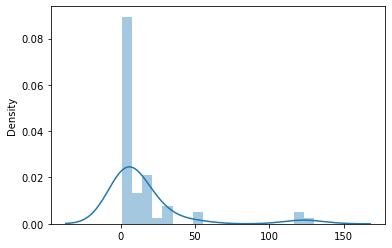

In [33]:
import seaborn as sns
sns.distplot(data)

In [34]:
data['log+1'] = (data['Column']+1).transform(np.log10)

In [35]:
data

,Column,log+1
0,1,0.301030
1,1,0.301030
2,10,1.041393
3,10,1.041393
4,15,1.204120
5,15,1.204120
6,20,1.322219
7,20,1.322219
8,30,1.491362
9,50,1.707570


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log+1', ylabel='Density'>

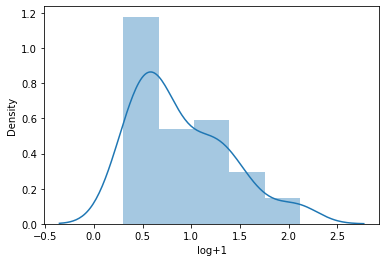

In [36]:
sns.distplot(data['log+1'])

# One-Hot Encoding 

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
x = [[11, "Spain"], [22, "France"], [33, "Spain"], [44, "Germany"], [55, "France"]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]]


In [39]:
x

[[11, 'Spain'], [22, 'France'], [33, 'Spain'], [44, 'Germany'], [55, 'France']]

# Grouping Operations 

In [40]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Continent
6049,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,Europe
6050,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,Europe
6052,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,Europe
6053,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,West
6054,06-01-2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,West


### Categorical Column Grouping

In [41]:
df.pivot_table(index='Location', columns='WindGustDir', 
                 values='Rainfall', aggfunc=np.sum, fill_value = 0)

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
Location,,,,,,,,,,,,,,,,
AliceSprings,285.6,126.4,327.4,153.6,65.0,55.8,32.4,66.8,102.0,320.0,200.0,105.6,122.8,103.6,13.0,44.2
Brisbane,1689.4,715.6,759.0,8.2,996.6,80.2,33.4,18.6,128.6,1204.6,859.0,277.8,149.0,982.6,202.8,326.6
Cairns,283.2,313.0,672.0,649.0,368.2,350.8,114.4,80.4,1827.6,3593.8,2201.2,179.4,0.0,164.0,190.6,64.8
Canberra,201.0,105.4,95.4,156.6,26.0,8.6,350.1,416.0,69.4,59.4,96.0,64.2,6.0,87.8,308.6,5.2
Cobar,26.2,37.8,91.2,94.4,60.2,12.2,11.8,10.8,31.6,40.6,6.8,42.6,29.2,9.4,47.8,78.8
CoffsHarbour,252.8,484.4,366.4,136.0,290.4,223.6,79.2,30.0,741.6,364.6,435.4,698.5,722.9,10.2,47.0,479.6
Darwin,993.8,434.8,558.8,971.6,490.6,286.8,809.2,1201.8,191.2,698.0,522.4,595.0,614.4,1271.6,2169.2,555.8
Hobart,66.2,18.8,121.2,100.6,26.4,10.6,257.8,500.0,254.8,162.6,228.2,414.8,406.4,214.4,163.2,203.0
Melbourne,0.6,2.2,6.2,502.8,17.0,55.4,128.4,101.0,617.8,45.0,294.8,448.4,501.4,378.0,63.8,466.4


### Numerical Column Grouping


In [42]:
data = df.groupby(["WindGustDir",'Location'])['Temp3pm'].mean()

In [43]:
type(data)

pandas.core.series.Series

In [44]:
data

WindGustDir  Location        
E            AliceSprings        27.517101
             Brisbane            25.398099
             Cairns              28.585507
             Canberra            21.166942
             Cobar               26.765217
             CoffsHarbour        22.732143
             Darwin              31.328210
             Hobart              14.437500
             Melbourne           18.675000
             MelbourneAirport    20.140000
             Mildura             24.840909
             Moree               24.745361
             MountGambier        18.797674
             NorfolkIsland       21.371827
             Nuriootpa           20.000000
             Perth               26.976642
             PerthAirport        28.832620
             Portland            18.277108
             Sale                20.986174
             Sydney              23.654651
             SydneyAirport       22.819626
             Townsville          27.551988
             WaggaWagga 

# Feature Split

In [45]:
dff = pd.DataFrame()

In [46]:
dff['Author'] = ["Luther N. Gonzalez","Charles M. Young","Terry Lawson","Kristen White","Thomas Logsdon"]

In [47]:
dff

,Author
0,Luther N. Gonzalez
1,Charles M. Young
2,Terry Lawson
3,Kristen White
4,Thomas Logsdon


### Extracting first names

In [48]:
dff.Author.str.split(" ").map(lambda x: x[0])

0     Luther
1    Charles
2      Terry
3    Kristen
4     Thomas
Name: Author, dtype: object

### Extracting last names

In [49]:
dff.Author.str.split(" ").map(lambda x: x[-1])

0    Gonzalez
1       Young
2      Lawson
3       White
4     Logsdon
Name: Author, dtype: object

# Feature Scaling

In [50]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Continent
6049,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,Europe
6050,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,Europe
6052,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,Europe
6053,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,West
6054,06-01-2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,20-06-2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,Europe
142299,21-06-2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,Europe
142300,22-06-2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,Europe
142301,23-06-2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,Europe


In [51]:
datee = pd.DataFrame()
datee['Date'] = df.Date

In [52]:
df.drop(columns='Date',inplace =True)

# Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['Continent'] = le.fit_transform(df['Continent'])

In [54]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Continent
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,3
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,0
142299,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,0
142300,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,0
142301,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,0


# Feature Scaling


### Standardization

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standard = sc.fit_transform(df)


In [56]:
standard

array([[-1.18184371,  0.69120848,  1.57529783, ..., -0.53244519,
        -0.53148543, -1.00220215],
       [-1.18184371,  0.76913098,  0.67150378, ..., -0.53244519,
        -0.53148543, -1.00220215],
       [-1.18184371,  0.92497598,  1.91960032, ..., -0.53244519,
        -0.53148543, -1.00220215],
       ...,
       [-0.90791487,  1.12757448,  1.23099533, ..., -0.53244519,
        -0.53148543, -1.00220215],
       [-0.90791487,  0.94056048,  1.08753596, ..., -0.53244519,
        -0.53148543, -1.00220215],
       [-0.90791487,  1.04965198,  1.07319002, ..., -0.53244519,
        -0.53148543, -1.00220215]])

### Normalization

In [57]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
minmax = mm.fit_transform(df)

In [58]:
minmax

array([[0.16      , 0.64566929, 0.70681818, ..., 0.        , 0.        ,
        0.        ],
       [0.16      , 0.65879265, 0.56363636, ..., 0.        , 0.        ,
        0.        ],
       [0.16      , 0.68503937, 0.76136364, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24      , 0.7191601 , 0.65227273, ..., 0.        , 0.        ,
        0.        ],
       [0.24      , 0.68766404, 0.62954545, ..., 0.        , 0.        ,
        0.        ],
       [0.24      , 0.70603675, 0.62727273, ..., 0.        , 0.        ,
        0.        ]])

# Extracting Dates

In [59]:
datee

,Date
6049,01-01-2009
6050,02-01-2009
6052,04-01-2009
6053,05-01-2009
6054,06-01-2009
...,...
142298,20-06-2017
142299,21-06-2017
142300,22-06-2017
142301,23-06-2017


In [60]:
from datetime import date

#### Current date

In [61]:
today_date = date.today()
print(today_date)

2021-08-09


#### Current Day 

In [62]:
today_date.day

9

#### Current Month

In [63]:
today_date.month

8

#### Current Year

In [64]:
today_date.year

2021

#### Weekday Number

In [65]:
today_date.weekday()

0

#### No of weeks in month 

In [66]:
print(today_date.isocalendar())
print(today_date.isocalendar()[1])


(2021, 32, 1)
32


#### Details about Current day

In [67]:
print('Weekday :',today_date.strftime('%A'))
print('Month :',today_date.strftime('%B'))
print('Week number :',today_date.strftime('%W'))
print("Locale's date and time representation :",today_date.strftime('%c'))

Weekday : Monday
Month : August
Week number : 32
Locale's date and time representation : Mon Aug  9 00:00:00 2021


## Date manipulation in a dataframe 

In [68]:
datee['Date'] = pd.to_datetime(datee['Date'], errors='coerce')

In [69]:
# day
datee['Day'] = datee['Date'].dt.day
# month
datee['Month'] = datee['Date'].dt.month
# year
datee['Year'] = datee['Date'].dt.year
# hour
datee['Start_hour'] = datee['Date'].dt.hour
# minute
datee['Start_minute'] = datee['Date'].dt.minute
# second
datee['Start_second'] = datee['Date'].dt.second
# Monday is 0 and Sunday is 6
datee['Start_weekday'] = datee['Date'].dt.weekday
# week of the year
datee['Start_week_of_year'] = datee['Date'].dt.week

<ipython-input-69-1bd814735862>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  datee['Start_week_of_year'] = datee['Date'].dt.week


In [70]:
datee

,Date,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year
6049,2009-01-01,1,1,2009,0,0,0,3,1
6050,2009-02-01,1,2,2009,0,0,0,6,5
6052,2009-04-01,1,4,2009,0,0,0,2,14
6053,2009-05-01,1,5,2009,0,0,0,4,18
6054,2009-06-01,1,6,2009,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,20,6,2017,0,0,0,1,25
142299,2017-06-21,21,6,2017,0,0,0,2,25
142300,2017-06-22,22,6,2017,0,0,0,3,25
142301,2017-06-23,23,6,2017,0,0,0,4,25
